In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import tensorflow_datasets as tfds
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

train_data, test_data = imdb['train'], imdb['test']

train_sentences = []
train_labels = []
test_sentences = []
test_labels = []
for s,l in train_data:
    train_sentences.append(s.numpy().decode('utf-8'))
    train_labels.append(l.numpy())

for s,l in test_data:
    test_sentences.append(s.numpy().decode('utf-8'))
    test_labels.append(l.numpy())

import numpy as np

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# HYPERPARAMETERS
vocab_size=10000
oov_tok="<OOV>"
max_len=120
embedding_dim=16
padding_type="post"
trunc_type="post"
num_epochs=50

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_len, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_len)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteH5RQE4/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteH5RQE4/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteH5RQE4/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

##Simple Model 

In [4]:
model_1 = tf.keras.Sequential([
            tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(6, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.summary()
model_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_1 = model_1.fit(train_padded, train_labels,
                        epochs=num_epochs, 
                        validation_data=(test_padded, test_labels))

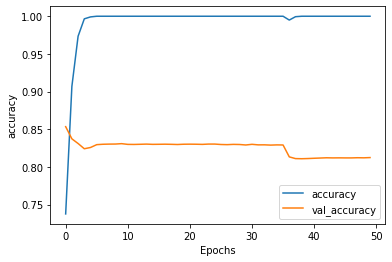

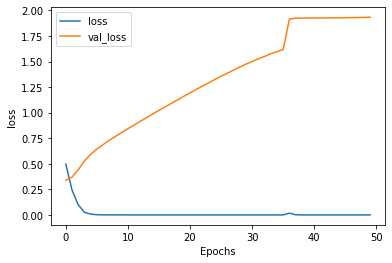

In [6]:
plot_graphs(history_1, "accuracy")
plot_graphs(history_1, "loss")

##GRU

In [7]:
model_2 = tf.keras.Sequential([
            tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
            tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
            tf.keras.layers.Dense(6, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.summary()
model_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_2 = model_2.fit(train_padded, train_labels,
                        epochs=num_epochs, 
                        validation_data=(test_padded, test_labels))

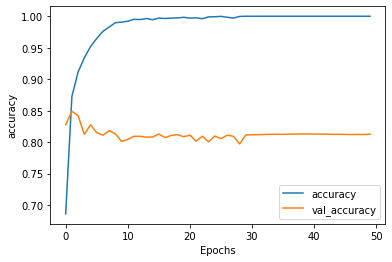

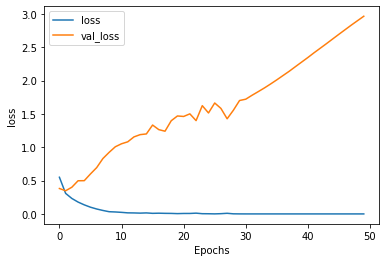

In [9]:
plot_graphs(history_2, "accuracy")
plot_graphs(history_2, "loss")

##LSTM

In [10]:
model_3 = tf.keras.Sequential([
            tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
            tf.keras.layers.Dense(6, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.summary()
model_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_3 = model_3.fit(train_padded, train_labels,
                        epochs=num_epochs, 
                        validation_data=(test_padded, test_labels))

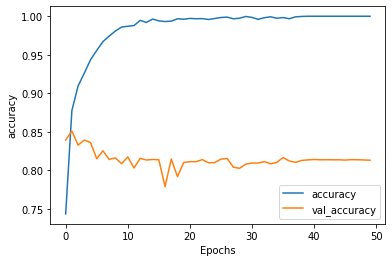

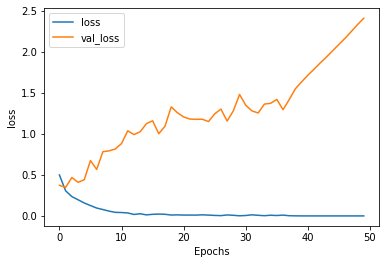

In [12]:
plot_graphs(history_3, "accuracy")
plot_graphs(history_3, "loss")

##Convolution

In [13]:
model_4 = tf.keras.Sequential([
            tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
            tf.keras.layers.Conv1D(128, 5, activation='relu'),
            tf.keras.layers.GlobalAveragePooling1D(),
            tf.keras.layers.Dense(6, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid")
])

model_4.summary()
model_4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_4 = model_4.fit(train_padded, train_labels,
                        epochs=num_epochs, 
                        validation_data=(test_padded, test_labels))

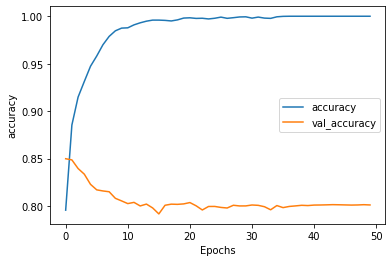

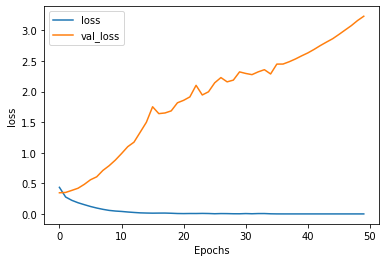

In [15]:
plot_graphs(history_4, "accuracy")
plot_graphs(history_4, "loss")

In [17]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [18]:
e = model_2.layers[0]
weights = e.get_weights()[0]

import io
out_v = io.open('vecs_imdb.tsv', 'w', encoding="utf-8")
out_m = io.open('meta_imdb.tsv', 'w', encoding="utf-8")
for word_num in range(1,vocab_size):
    word = reverse_word_index[word_num]
    embedding = weights[word_num]
    out_m.write(word + '\n')
    out_v.write('\t'.join([str(val) for val in embedding]) + '\n')
out_m.close()
out_v.close()

try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('vecs_imdb.tsv')
    files.download('meta_imdb.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>